# Python Packages - Pandas

In [1]:
from IPython.display import display

## pandas 這個模組對我們在 Python 上進行資料處理時非常有幫助。

In [2]:
import pandas

### pandas 模組中一個很重要的部分為在 Data Structures 中介紹的 DataFrame。

In [3]:
from pandas import DataFrame

Date_1 = ["2012/01/02","2012/01/03","2012/01/04","2012/01/05"]
Price_1 = [20.15,20.5,19.3,20.2]
Volume_1 = [1000,3000,500,1500]

Date_2 = ["2012/01/08","2012/01/09","2012/01/10","2012/01/11"]
Price_2 = [21.15,22.5,21.9,20.2]
Volume_2 = [1200,3500,100,1500]

data_1 = DataFrame([Price_1, Volume_1], columns=Date_1, index=["Price", "Volume"])
data_2 = DataFrame([Price_2, Volume_2], columns=Date_2, index=["Price", "Volume"])

pandas.concat([data_1, data_2], axis=1)

,2012/01/02,2012/01/03,2012/01/04,2012/01/05,2012/01/08,2012/01/09,2012/01/10,2012/01/11
Price,20.15,20.5,19.3,20.2,21.15,22.5,21.9,20.2
Volume,1000.00,3000.0,500.0,1500.0,1200.00,3500.0,100.0,1500.0


### 此外，還有讀取 Excel、csv 檔的 Function

^TWII.csv 為從 Yahoo Finance 直接下載下來的台灣加權股價指數的檔案

In [4]:
# pandas.read_excel
pandas.read_csv("^TWII.csv", nrows=10)

,Date,Open,High,Low,Close,Volume
0,2010-01-04,8222.42,8240.45,8143.45,8207.85,171654000
1,2010-01-05,8277.71,8283.64,8162.54,8211.40,197447000
2,2010-01-06,8237.10,8327.87,8216.92,8327.62,188532000
3,2010-01-07,8344.56,8369.55,8233.59,8237.42,203298000
4,2010-01-08,8266.87,8290.66,8178.93,8280.90,161863000
5,2010-01-11,8291.52,8357.90,8281.72,8323.82,155046000
6,2010-01-12,8343.73,8356.97,8262.58,8309.37,148635000
7,2010-01-13,8229.25,8257.83,8194.81,8196.56,142191000
8,2010-01-14,8245.86,8313.94,8237.67,8289.98,147832000
9,2010-01-15,8340.60,8380.23,8325.82,8356.89,172631000


In [5]:
pandas.read_csv("^TWII.csv", nrows=10, index_col=0)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,8222.42,8240.45,8143.45,8207.85,171654000
2010-01-05,8277.71,8283.64,8162.54,8211.40,197447000
2010-01-06,8237.10,8327.87,8216.92,8327.62,188532000
2010-01-07,8344.56,8369.55,8233.59,8237.42,203298000
2010-01-08,8266.87,8290.66,8178.93,8280.90,161863000
2010-01-11,8291.52,8357.90,8281.72,8323.82,155046000
2010-01-12,8343.73,8356.97,8262.58,8309.37,148635000
2010-01-13,8229.25,8257.83,8194.81,8196.56,142191000
2010-01-14,8245.86,8313.94,8237.67,8289.98,147832000


In [6]:
raw_TWII_data = pandas.read_csv("^TWII.csv", index_col=0)

In [7]:
raw_TWII_data.index[0]

'2010-01-04'

### 由於 csv 檔中的日期為字串（string），希望將他轉為 datetime.datetime 的形式。

直接利用 datetime.datetime.strptime 對每一個日期的元素作轉換

In [8]:
import datetime
TWII_date = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in raw_TWII_data.index.tolist()]
TWII_data = raw_TWII_data.copy()
TWII_data.index = TWII_date
TWII_data.index[0]

Timestamp('2010-01-04 00:00:00')

或是 pandas 中有一個 to_datetime function 可以利用

如果 Dataframe 中有希望從字串轉為數字的欄位，也可以利用 pandas.to_numeric。

In [9]:
pandas.to_datetime(raw_TWII_data.index).tolist()[:10]

[Timestamp('2010-01-04 00:00:00'),
 Timestamp('2010-01-05 00:00:00'),
 Timestamp('2010-01-06 00:00:00'),
 Timestamp('2010-01-07 00:00:00'),
 Timestamp('2010-01-08 00:00:00'),
 Timestamp('2010-01-11 00:00:00'),
 Timestamp('2010-01-12 00:00:00'),
 Timestamp('2010-01-13 00:00:00'),
 Timestamp('2010-01-14 00:00:00'),
 Timestamp('2010-01-15 00:00:00')]

### 其實在做接下來的計算會發現，日期並沒有排序正確，可以先做個 DataFrame.sort_index( ) 以防萬一。

In [10]:
TWII_data = TWII_data.sort_index()

In [11]:
TWII_data.iloc[:10]

,Open,High,Low,Close,Volume
1967-01-09,92.68,92.82,92.68,92.82,0.0
1967-01-10,92.82,92.83,92.82,92.83,0.0
1967-01-11,92.83,93.17,92.83,93.17,0.0
1967-01-12,93.17,93.17,92.70,92.70,0.0
1967-01-13,92.70,93.46,92.70,93.46,0.0
1967-01-14,93.46,94.13,93.46,94.13,0.0
1967-01-16,94.13,95.37,94.13,95.37,0.0
1967-01-17,95.37,95.37,94.60,94.60,0.0
1967-01-18,94.60,94.94,94.60,94.94,0.0
1967-01-19,94.94,94.94,94.83,94.83,0.0


### pandas 中有些與 rolling 相關的 function，皆可以協助我們利用 moving window 的方式，對資料進行統計運算。
### 這些 rolling 相關的 function 已經都直接被改至 DataFrame 底下，所以可以直接被 DataFrame 型態的資料所使用。

In [12]:
pandas.rolling_mean(TWII_data, window=2, axis=0).head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False,axis=0).mean()
  if __name__ == '__main__':


,Open,High,Low,Close,Volume
1967-01-09,NaN,NaN,NaN,NaN,NaN
1967-01-10,92.750,92.825,92.750,92.825,0.0
1967-01-11,92.825,93.000,92.825,93.000,0.0
1967-01-12,93.000,93.170,92.765,92.935,0.0
1967-01-13,92.935,93.315,92.700,93.080,0.0


In [13]:
TWII_data.rolling(window=2, axis=0).mean().head()

,Open,High,Low,Close,Volume
1967-01-09,NaN,NaN,NaN,NaN,NaN
1967-01-10,92.750,92.825,92.750,92.825,0.0
1967-01-11,92.825,93.000,92.825,93.000,0.0
1967-01-12,93.000,93.170,92.765,92.935,0.0
1967-01-13,92.935,93.315,92.700,93.080,0.0


### 除了 mean 外，還可以計算 max、min、median、quantile 以及 std 與 var。
### 也可以計算 correlation（corr）及（cov）。

In [14]:
TWII_data.rolling(window=20, axis=0).corr().iloc[19]

,Open,High,Low,Close,Volume
Open,1.000000,0.878655,0.921200,0.673388,NaN
High,0.878655,1.000000,0.905088,0.914506,NaN
Low,0.921200,0.905088,1.000000,0.855519,NaN
Close,0.673388,0.914506,0.855519,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN


In [15]:
TWII_data.rolling(window=20, axis=0).cov().iloc[19]

,Open,High,Low,Close,Volume
Open,0.642646,0.550816,0.497747,0.405917,0.0
High,0.550816,0.611511,0.477047,0.537742,0.0
Low,0.497747,0.477047,0.454295,0.433595,0.0
Close,0.405917,0.537742,0.433595,0.565420,0.0
Volume,0.000000,0.000000,0.000000,0.000000,0.0


### Rolling 的用法在財務上，讓我們很方便的可以對價格資料進行技術分析的運算。
### 更有 ewma 直接計算 Exponentially-weighted moving average。

In [16]:
TWII_data.ewm(ignore_na=False,span=2,min_periods=0,adjust=True).mean().iloc[:10]

,Open,High,Low,Close,Volume
1967-01-09,92.680000,92.820000,92.680000,92.820000,0.0
1967-01-10,92.785000,92.827500,92.785000,92.827500,0.0
1967-01-11,92.816154,93.064615,92.816154,93.064615,0.0
1967-01-12,93.055000,93.135750,92.737750,92.818500,0.0
1967-01-13,92.817355,93.352810,92.712479,93.247934,0.0
1967-01-14,93.246374,93.871648,93.211511,93.836786,0.0
1967-01-16,93.835727,94.871006,93.824117,94.859396,0.0
1967-01-17,94.858732,95.203720,94.341451,94.686439,0.0
1967-01-18,94.686235,95.027898,94.513826,94.855488,0.0
1967-01-19,94.855415,94.969298,94.724612,94.838496,0.0


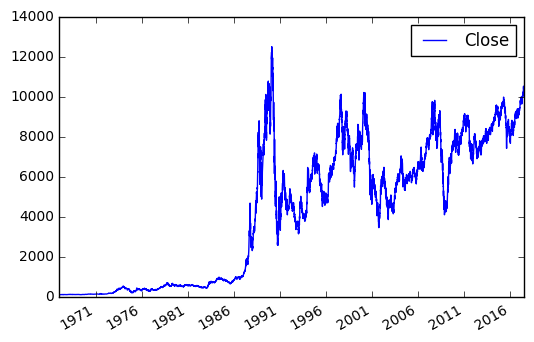

In [17]:
% matplotlib inline
TWII_data[["Close"]].plot()

### 如果想要算出每隔一段時間（如一個月、一週、一季）的統計數據，可以先用 DataFrame.groupy( ) 將資料按照需要的時間段做分群。分群後就可以在後面接上 .mean( )、.std( ) 等等需要的統計資訊。
### 其中可以使用 pandas.TimeGrouper( freq="" ) 來設定每一段的時間長度：
    - 'M'：monthly
    - 'A'：annually
    - 'Q'：quarterly
    - 'W'：weekly
其餘可以用的週期可以參考：https://chrisalbon.com/python/pandas_group_data_by_time.html

In [18]:
TWII_data.groupby(pandas.TimeGrouper(freq="M"))

In [19]:
TWII_data.groupby(pandas.TimeGrouper(freq="M")).mean().iloc[-5:]

,Open,High,Low,Close,Volume
2017-04-30,9803.947222,9832.740000,9764.031667,9801.368333,8.730044e+07
2017-05-31,9988.347500,10017.369000,9963.268500,9993.664000,8.800555e+07
2017-06-30,10250.495455,10292.904545,10226.945455,10266.772727,9.382850e+07
2017-07-31,10417.457143,10452.071429,10390.542857,10425.923810,9.634929e+07
2017-08-31,10408.500000,10470.000000,10408.500000,10437.300000,1.101720e+08


In [20]:
TWII_data.groupby(pandas.TimeGrouper(freq="2M")).std().iloc[:5]

,Open,High,Low,Close,Volume
1967-01-31,0.801652,0.781991,0.674014,0.751944,0.0
1967-03-31,1.245570,1.269909,1.198926,1.279941,0.0
1967-05-31,1.516560,1.447828,1.441732,1.413644,0.0
1967-07-31,1.400229,0.995985,1.665990,1.412294,0.0
1967-09-30,0.871405,0.895044,0.863952,0.909038,0.0


In [21]:
TWII_data.groupby(pandas.TimeGrouper(freq="A")).std().iloc[-5:]

,Open,High,Low,Close,Volume
2013-12-31,224.768318,225.054299,228.432674,227.439215,1.190646e+07
2014-12-31,299.746665,301.053491,298.040009,301.606118,1.663930e+07
2015-12-31,606.639972,599.542285,616.708804,605.856051,1.675109e+07
2016-12-31,447.139353,441.396992,453.804624,446.308023,1.534483e+07
2017-12-31,342.128954,345.135509,342.950485,345.084810,1.608712e+07


In [22]:
TWII_data.groupby(pandas.TimeGrouper(freq="2A")).std().iloc[-5:]

,Open,High,Low,Close,Volume
2009-12-31,1434.477080,1430.039307,1425.131935,1423.952895,4.354198e+07
2011-12-31,621.192274,617.410853,626.564591,623.072906,2.616283e+07
2013-12-31,407.151783,404.750903,409.358766,406.282011,2.028352e+07
2015-12-31,476.743075,472.549765,482.836720,476.907366,1.668243e+07
2017-12-31,696.010583,691.733901,704.079720,697.617867,1.679610e+07


In [23]:
help(pandas)

Help on package pandas:

NAME
    pandas

FILE
    /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/__init__.py

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    See http://pandas.pydata.org/ for full documentation. Otherwise, see the
    docstrings of the various objects in the pandas namespace:
    
    Series
    DataFrame
    Panel
    Index
    DatetimeIndex
    HDFStore
    bdate_range
    date_range
    read_csv
    read_fwf
    read_table
    ols

PACKAGE CONTENTS
    _period
    _sparse
    _testing
    _version
    algos
    compat (package)
    computation (package)
    core (package)
    formats (package)
    hashtable
    index
    indexes (package)
    info
    io (package)
    json
    lib
    msgpack (package)
    parser
    rpy (package)
    sandbox (package)
    sparse (package)
    stats (package)
    tests (package)
    tools (package)
    tseries (package)
    tslib
    types (package